In [1]:
!pip install torch torchvision torchaudio --user

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ------------------------------------- 172.4/172.4 MB 32.7 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 25.2 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 34.2 MB/s eta 0:00:00


In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import pandas
import numpy as np
import pandas as pd
import csv
import nltk.corpus
#nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [2]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

In [3]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [12]:
#transfer words into tokens - a vector space
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')
print(tokens)
#model application
result = model(tokens)
print(result)
#go the sentiment for each word
print(result.logits)
#overall sentiment result
int(torch.argmax(result.logits))+1

tensor([[  101, 10197, 10140, 12050, 10502, 12296, 10598, 10662, 16197,   119,
         11838,   102]])
SequenceClassifierOutput(loss=None, logits=tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)


4

In [58]:
?WordCloud
!pip install wordcloud

Object `WordCloud` not found.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 153.3/153.3 kB ? eta 0:00:00


In [4]:
import pandas as pd

# After downloading answers from google questionnaire, open excel file
df = pd.read_excel('D://BIRMINGHAM//PROJECT//HSBC//second_start.xlsx')
# Convert excel file to csv file
df.to_csv('D://BIRMINGHAM//PROJECT//HSBC//answers_new.csv', index=False)
# Read the new csv file for further work process
df = pd.read_csv('D://BIRMINGHAM//PROJECT//HSBC//answers_new.csv', index_col=0)
# Get the answers from the document
list_of_all_answers = []
for i in range(1, 4):
    answers_list = df['Answers'+str(i)].tolist()
    list_of_all_answers.append(answers_list)
#print(list_of_all_answers)

In [ ]:
# Get the answers from the document
list_of_all_answers = []
for i in range(1, 4):
    answers_list = df['Answers'+str(i)].tolist()
    list_of_all_answers.append(answers_list)   

In [7]:
# Cleaning data
# Checking for duplicates, non values and cleaning from '\' simbol
from collections import Counter
import math
from nltk.corpus import stopwords

# Flatten the matrix into a single list
flat_matrix = [item for sublist in list_of_all_answers for item in sublist]

# Count occurrences of each item in the list
item_counts = Counter(flat_matrix)

# Normilising and Deleting duplicates and unnecessary symbols 
cleaned_data_fisrt_stage = []
for sublist in list_of_all_answers:
    new_sublist = [sentence for sentence in sublist if item_counts[sentence] == 1 or sentence == "NaN"]
    new_sublist = [re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", '', sentence) 
                   for sentence in new_sublist]
    new_sublist = [re.sub(r"HSBC", '', sentence) 
                   for sentence in new_sublist]
    new_sublist = [sentence.lower() for sentence in new_sublist]
    cleaned_data_fisrt_stage.append(new_sublist)

In [8]:
# Remove stopwords from each sentence
stop_words = set(stopwords.words('english'))

cleaned_data_second_stage = []
for sublist in cleaned_data_fisrt_stage:
    cleaned_sublist = []
    for sentence in sublist:
        words = sentence.split()  
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_sublist.append(' '.join(cleaned_words)) 
    cleaned_data_second_stage.append(cleaned_sublist)

In [9]:
# Steamming process
stemmer = PorterStemmer()

cleaned_data = []
for sublist in cleaned_data_second_stage:
    stemmed_sublist = []
    for sentence in sublist:
        words = word_tokenize(sentence)  
        stemmed_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
        stemmed_sublist.append(' '.join(stemmed_words)) 
    cleaned_data.append(stemmed_sublist)
print(cleaned_data[0])

['includ dedic section sustain invest option within client app brilliant idea effect showcas bank dedic respons invest practic', 'believ educ client sustain invest opportun app significantli enhanc satisfact bank sustain initi underscor commit offer ethic invest choic', 'introduc segment focus environment educ app truli wonder deepen connect broader goal contribut sustain futur', 'gain better understand sustain invest solut via app would certainli boost confid choos step crucial align financi choic valu', 'provid comprehens sustain educ mark posit stride forward strengthen credibl showcas commit educ consum matter beyond financ', 'appreci idea educ client sustain invest overal sustain perfectli embodi holist dedic respons bank', 'would feel inform content sustain commit app offer detail insight sustain invest altern', 'incorpor sustain educ section would undoubtedli solidifi reliabl conscienti financi partner view', 'im eagerli anticip inclus dedic app section learn sustain add valuabl

In [ ]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming and lemmatization to each sentence
stemmed_matrix = []
lemmatized_matrix = []
for sublist in cleaned_data_second_stage:
    stemmed_sublist = []
    lemmatized_sublist = []
    for sentence in sublist:
        words = word_tokenize(sentence)  # Tokenize the sentence into words
        stemmed_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
        stemmed_sublist.append(' '.join(stemmed_words))  # Join the stemmed words back into a sentence
        lemmatized_sublist.append(' '.join(lemmatized_words))  # Join the lemmatized words back into a sentence
    stemmed_matrix.append(stemmed_sublist)
    lemmatized_matrix.append(lemmatized_sublist)

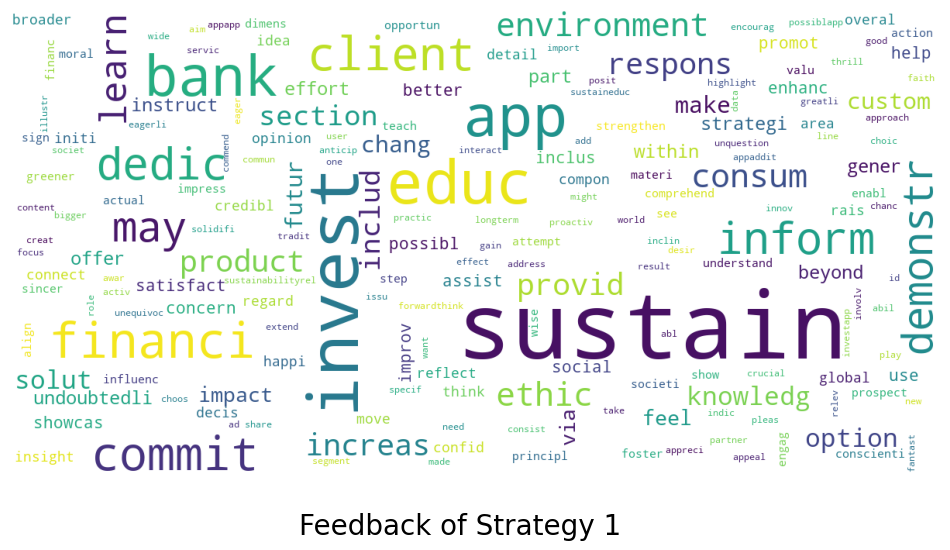

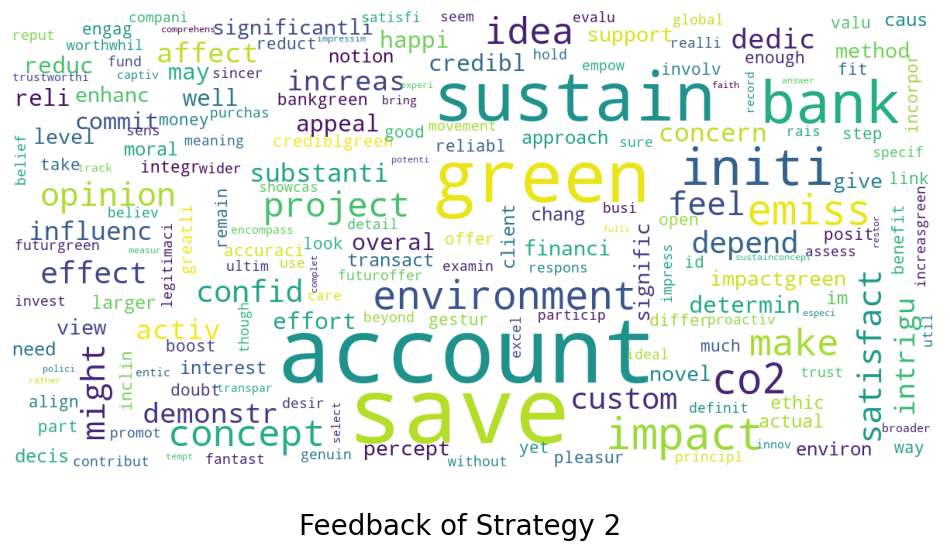

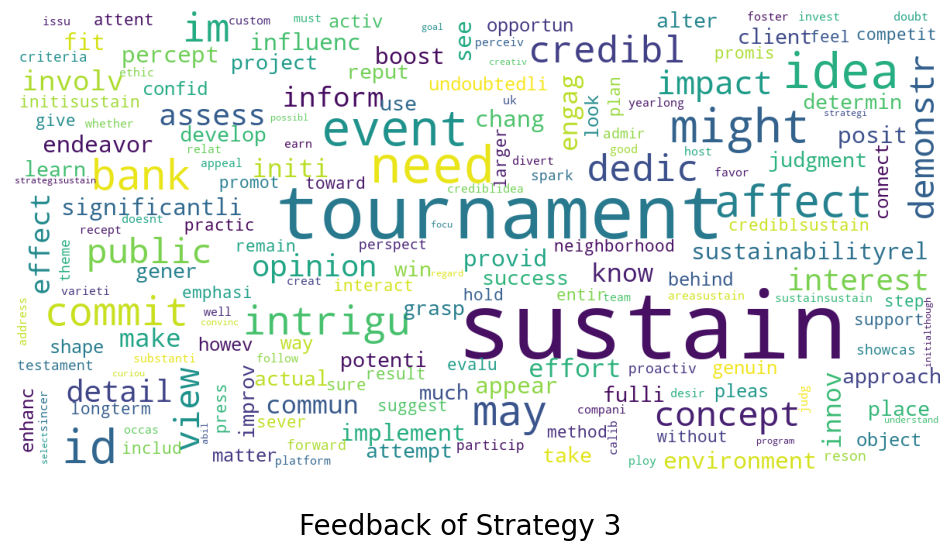

In [10]:
# Data visualisation in wordclouds
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#stopwords_new = set(STOPWORDS)

def wordcloud_plot(text, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=0,
        collocations = False
    ).generate(str(text))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

for i in range(0,3):
    text = ''.join(cleaned_data[i])
    wordcloud_plot(text, title = 'Feedback of Strategy ' + str(i+1))

In [13]:
# Embedding process
def Embedding (answers_list: list):
    tokens_list = []
    for i in range(0, len(answers_list)):
        tokens = tokenizer.encode(answers_list[i], return_tensors='pt')
        tokens_list.append(tokens)
    return tokens_list

list_Embedding = []
for i in range(0,3):
    list_Embedding.append(Embedding(cleaned_data[i]))
    
    
print(list_Embedding)

[[tensor([[  101, 13565, 11567, 10163, 13905, 10877, 41722, 10104, 39368, 28961,
         53798, 33160, 31512, 35821, 28261, 14653, 66264, 35176, 12638, 10241,
         16378, 49159, 14389, 10104, 39368, 49411, 13442,   102]]), tensor([[  101, 23333, 46497, 31512, 53798, 33160, 10877, 41722, 10104, 39368,
         23518, 10459, 31809, 11310, 35821, 13565, 13480, 10107, 90606, 45220,
         13641, 10123, 12638, 10877, 41722, 18059, 10116, 17982, 10408, 11391,
         18593, 10116, 11061, 41194, 10763, 68221, 11183, 10104, 39368, 28961,
           102]]), tensor([[  101, 33989, 10517, 13905, 19569, 22291, 10261, 35821, 28261, 11008,
         29605, 10142, 44529, 53798, 33160, 20306, 15292, 52529, 45795, 11274,
         10877, 41722, 32291,   102]]), tensor([[  101, 34990, 53798, 33160, 10877, 41722, 10104, 39368, 13238, 11274,
         35821, 11008, 26210, 13565, 13480, 10107, 10173, 14810, 10163, 30801,
         50373, 21811, 44529, 48980, 23571, 32937, 10310, 23432,   102]]), tensor

In [14]:
# Model application
def BERTmodelapplication (tokens_list: list):
    result_list = []
    for i in range(0, len(tokens_list)):
        result = model(tokens_list[i])
        result_list.append(result)
    return result_list

list_BERTmodelapplication = []
for i in range(0,3):
    list_BERTmodelapplication.append(BERTmodelapplication(list_Embedding[i]))

print(list_BERTmodelapplication)

[[SequenceClassifierOutput(loss=None, logits=tensor([[-1.0522, -1.0749,  0.1196,  0.7906,  1.0023]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-1.4303, -1.2879, -0.0190,  0.9996,  1.2371]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-1.4909, -0.7516,  0.4082,  0.9044,  0.5739]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-1.5252, -1.1016,  0.2079,  0.9346,  1.1135]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-1.7522, -1.6415, -0.0195,  1.3255,  1.6480]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None), SequenceClassifierOutput(loss=None, logits=tensor([[-0.9202, -0.9310,  0.0788,  0.6092,  0.7805]],
       grad_fn=<AddmmBackward0>), hidden_sta

In [19]:
# Sentiment score distributions calculation
def Sentiment_score (result_list: list):
    sentiment_score_list = []
    for i in range(0, len(result_list)):
        sentiment_score = int(torch.argmax(result_list[i].logits))+1
        sentiment_score_list.append(sentiment_score)
    return sentiment_score_list

list_scores = []
for i in range(0,3):
    scores = Sentiment_score(list_BERTmodelapplication[i])
    list_scores.append(scores)
    
print(list_scores)

[[5, 5, 4, 5, 5, 5, 3, 4, 4, 4, 5, 5, 5, 5, 4, 5, 4, 3, 4, 5, 3, 4, 4, 5, 5, 3, 3, 5, 3, 4, 3, 5, 3, 5, 3, 4, 4, 3, 4, 3, 4, 3, 4, 5, 3, 5, 5, 4, 4, 5, 4, 4, 5, 5, 5, 4, 3, 3, 4, 5, 5, 5, 3, 4, 5, 3, 4, 5, 1, 5, 4, 5, 4, 4, 4, 4, 4, 3, 5, 3, 4, 4, 3, 5, 3, 3, 3, 4, 3, 4, 4, 5, 4, 3, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4, 5, 3, 5, 1, 4, 4, 1], [1, 3, 3, 4, 1, 3, 4, 5, 5, 1, 3, 5, 5, 5, 3, 5, 1, 3, 4, 4, 5, 4, 1, 5, 4, 3, 5, 5, 3, 5, 5, 3, 4, 3, 1, 4, 3, 1, 4, 3, 4, 3, 3, 4, 1, 1, 3, 5, 3, 4, 3, 5, 4, 1, 1, 1, 3, 5, 4, 5, 4, 3, 4, 1, 4, 5, 3, 4, 1, 3, 3, 4, 3, 3, 3, 4, 3, 1, 3, 3, 4, 3, 2, 4, 3, 2, 3, 3, 3, 4, 4, 5, 4, 3, 3, 5, 3, 5, 4, 3, 3, 4, 4, 4, 5, 3, 3, 2, 4, 3, 5, 3, 2, 3, 5, 1, 3], [4, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 3, 5, 4, 5, 3, 3, 4, 3, 5, 5, 5, 5, 3, 4, 5, 4, 3, 3, 4, 4, 3, 1, 3, 4, 3, 2, 1, 3, 5, 4, 4, 3, 1, 2, 5, 4, 4, 3, 3, 4, 5, 4, 4, 4, 5, 4, 3, 4, 5, 5, 3, 3, 3, 5, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 5, 3, 3, 4, 5, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 5, 4

In [230]:
for i in range(0,3):
    print(Counter(list_scores[i]))

Counter({5: 45, 4: 43, 3: 26, 1: 3})
Counter({3: 44, 4: 30, 5: 23, 1: 16, 2: 4})
Counter({3: 47, 4: 35, 5: 32, 1: 3, 2: 2})


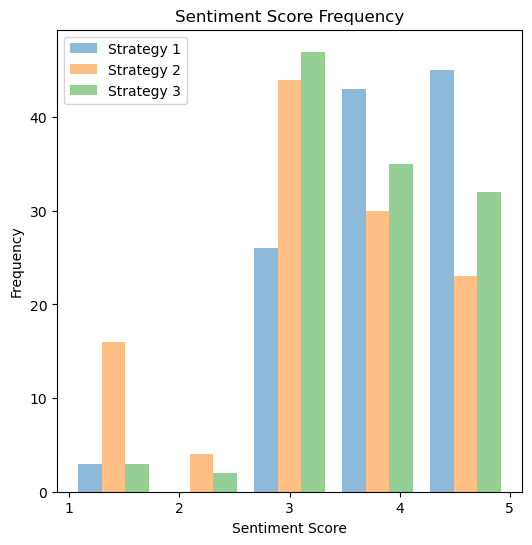

In [231]:
# Create a figure and axis
plt.figure(figsize=(6, 6))

# Plot the three distributions
#for i in range(0,3):
plt.hist([list_scores[0],list_scores[1],list_scores[2]], bins=5, alpha=0.5)
plt.xticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'])
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Frequency')
plt.legend(['Strategy 1', 'Strategy 2', 'Strategy 3'])
plt.show()

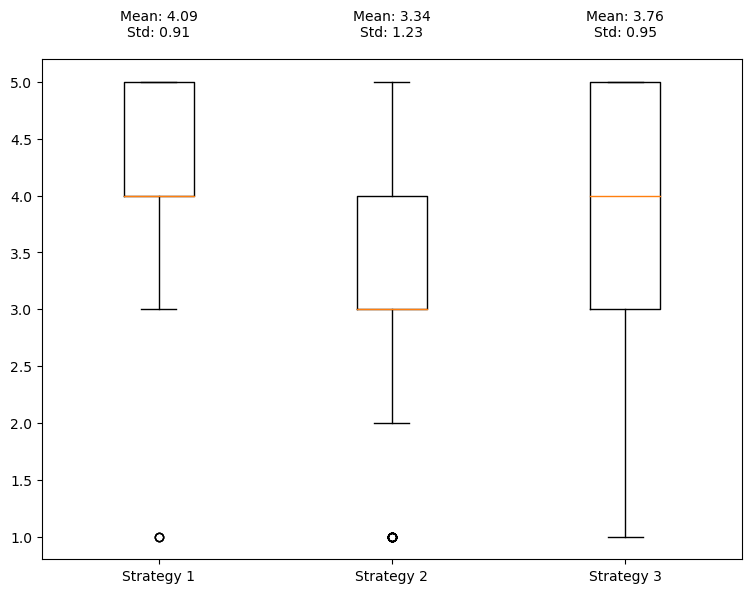

In [232]:
fig = plt.figure(figsize =(7, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Plot the box plot
plt.boxplot(list_scores, labels=['Strategy 1', 'Strategy 2', 'Strategy 3'])

# Add numbers on the plot
for i, d in enumerate(list_scores, start=1):
    y_pos = np.max(d) + 0.4
    plt.text(i, y_pos, f'Mean: {np.mean(d):.2f}\nStd: {np.std(d):.2f}', ha='center')

# Creating plot
#bp = ax.boxplot(list_scores)
 
# show plot
plt.show()

In [21]:
# Comparing distributions statistically 
import scipy.stats as stats
#from scipy.stats import f_oneway

# Your three numbers

# Perform F-test
f_statistic, p_value = stats.f_oneway(list_scores[0], list_scores[1], list_scores[2])

# Significance level
alpha = 0.05  
if p_value < alpha:
    print("At least one number is significantly different.")
else:
    print("All numbers are not significantly different.")
    
print(p_value)

At least one number is significantly different.
5.852221267757218e-07


In [22]:
t_statistic, p_value = stats.ttest_ind(list_scores[1], list_scores[2])

# Display the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Means are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means.")

T-Statistic: -2.949320087659343
P-Value: 0.0035077492365949412
Reject the null hypothesis: Means are significantly different.
